# NGBoost

## Case 1: 線形データ・不均一分散

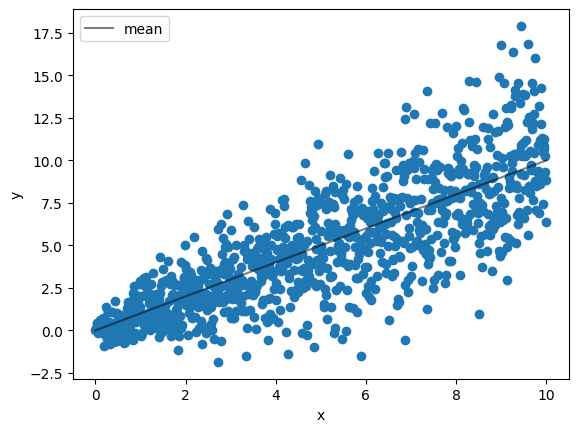

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 10, 1000)
sigma = np.sqrt(x)
y = norm.rvs(loc=x, scale=sigma, random_state=0)
X = x.reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, x, color="black", alpha=.5, label="mean")
ax.set(xlabel="x", ylabel="y")
ax.legend()
fig.show()

In [3]:
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, y_train)
y_pred = ngb.predict(X_test)
y_dist = ngb.pred_dist(X_test)

print('Test MSE', mean_squared_error(y_pred, y_test))

# test Negative Log Likelihood
test_NLL = -y_dist.logpdf(y_test).mean()
print('Test NLL', test_NLL)

[iter 0] loss=2.7115 val_loss=0.0000 scale=1.0000 norm=3.0518
[iter 100] loss=2.1809 val_loss=0.0000 scale=2.0000 norm=3.5402
[iter 200] loss=1.9916 val_loss=0.0000 scale=2.0000 norm=3.3163
[iter 300] loss=1.9225 val_loss=0.0000 scale=2.0000 norm=3.2371
[iter 400] loss=1.8822 val_loss=0.0000 scale=1.0000 norm=1.5870
Test MSE 4.749919918229181
Test NLL 2.3465523722882122


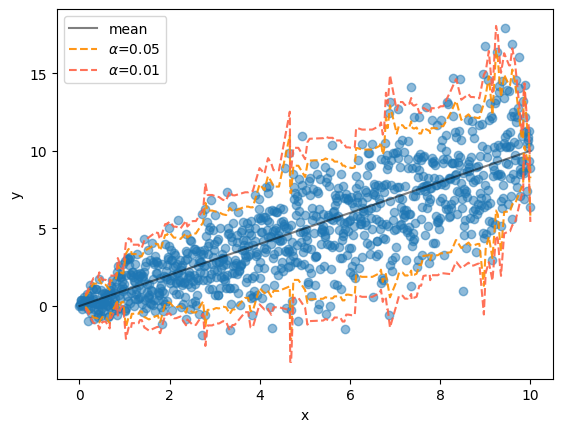

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=.5)
ax.plot(x, x, color="black", alpha=.5, label="mean")
ax.set(xlabel="x", ylabel="y")
ax.legend()

X_test = np.sort(X_test, axis=0)
y_dist = ngb.pred_dist(X_test)

alphas = [0.05, 0.01]
colors = ["darkorange", "tomato"]
for alpha, color in zip(alphas, colors):
    upper = norm.ppf(q=1 - (alpha/2), loc=y_dist.params["loc"], scale=y_dist.params["scale"])
    lower = norm.ppf(q=(alpha/2), loc=y_dist.params["loc"], scale=y_dist.params["scale"])
    ax.plot(X_test[:, 0], upper, alpha=.9, color=color, linestyle="--", label=rf"$\alpha$={alpha}")
    ax.plot(X_test[:, 0], lower, alpha=.9, color=color, linestyle="--")

ax.legend()
fig.show()

## Case 2: 非線形データ・不均一分散

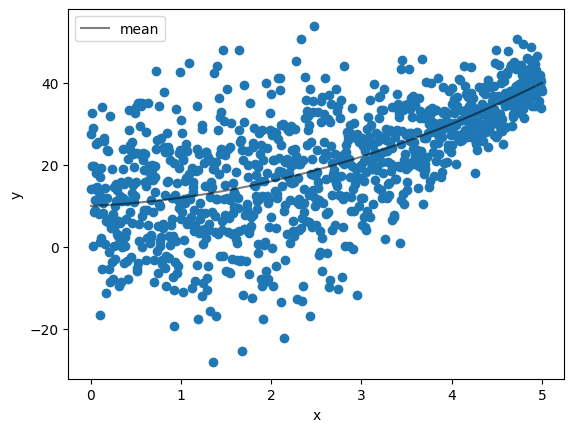

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, 5, 1000)
sigma = (np.sin(x / 1) + 2) * 5
z = 10 + x + x ** 2
y = norm.rvs(loc=z, scale=sigma, random_state=0)
X = x.reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, z, color="black", alpha=.5, label="mean")
ax.set(xlabel="x", ylabel="y")
ax.legend()
fig.show()

In [6]:
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, y_train)
y_pred = ngb.predict(X_test)
y_dist = ngb.pred_dist(X_test)

print('Test MSE', mean_squared_error(y_pred, y_test))

# test Negative Log Likelihood
test_NLL = -y_dist.logpdf(y_test).mean()
print('Test NLL', test_NLL)

[iter 0] loss=4.0907 val_loss=0.0000 scale=1.0000 norm=12.0060
[iter 100] loss=3.7361 val_loss=0.0000 scale=2.0000 norm=16.7148
[iter 200] loss=3.5979 val_loss=0.0000 scale=2.0000 norm=15.8449
[iter 300] loss=3.5428 val_loss=0.0000 scale=1.0000 norm=7.6860
[iter 400] loss=3.5044 val_loss=0.0000 scale=2.0000 norm=15.0169
Test MSE 134.79635773643105
Test NLL 3.9378722125585215


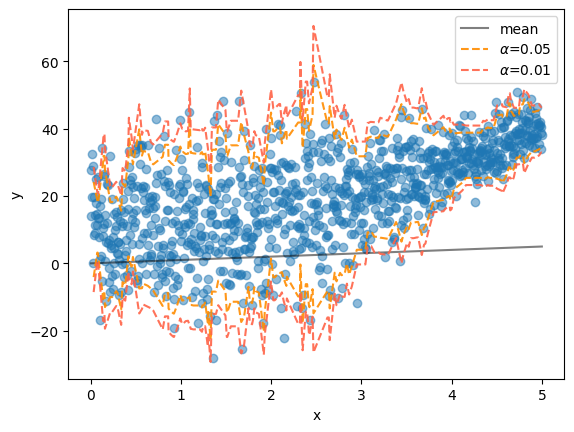

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=.5)
ax.plot(x, x, color="black", alpha=.5, label="mean")
ax.set(xlabel="x", ylabel="y")
ax.legend()

X_test = np.sort(X_test, axis=0)
y_dist = ngb.pred_dist(X_test)

alphas = [0.05, 0.01]
colors = ["darkorange", "tomato"]
for alpha, color in zip(alphas, colors):
    upper = norm.ppf(q=1 - (alpha/2), loc=y_dist.params["loc"], scale=y_dist.params["scale"])
    lower = norm.ppf(q=(alpha/2), loc=y_dist.params["loc"], scale=y_dist.params["scale"])
    ax.plot(X_test[:, 0], upper, alpha=.9, color=color, linestyle="--", label=rf"$\alpha$={alpha}")
    ax.plot(X_test[:, 0], lower, alpha=.9, color=color, linestyle="--")

ax.legend()
fig.show()